### Sales Prediction With Python

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

In [66]:
# Import packages and classes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm

from sklearn.model_selection import GridSearchCV
import warnings


In [67]:
import statsmodels.api as sm
warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()

'C:\\Users\\F5164729\\OneDrive - FRG\\Desktop\\Oasis Info Byte Internship'

In [68]:
# Read the advertising.csv file
advertising=pd.read_csv('advertising.csv')
advertising.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [69]:
advertising.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### Data Cleaning

In [70]:
advertising.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

### Exploratory Data Analysis

In [71]:
advertising.shape

(200, 5)

In [97]:
#printing information on the dataset
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [98]:
# Print mathematical description
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [99]:
#Checking for missing value
advertising.isnull().values.any()
advertising.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

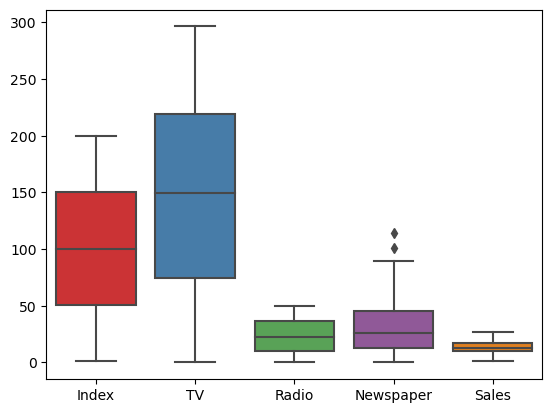

In [100]:
#Outlier analysis through boxlot
ax = sns.boxplot(data=advertising,orient='v',palette="Set1")

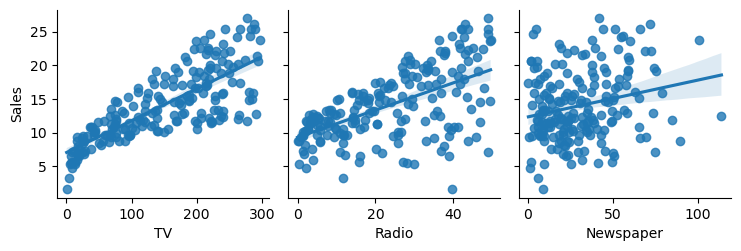

In [101]:
#Ploting sales against TV, Radio & Newspaper
sns.pairplot(advertising, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'TV'}>],
       [<AxesSubplot:title={'center':'Radio'}>,
        <AxesSubplot:title={'center':'Newspaper'}>],
       [<AxesSubplot:title={'center':'Sales'}>, <AxesSubplot:>]],
      dtype=object)

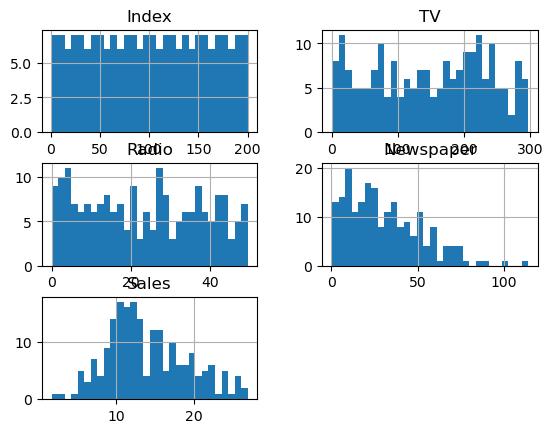

In [102]:
advertising.hist(bins=30)

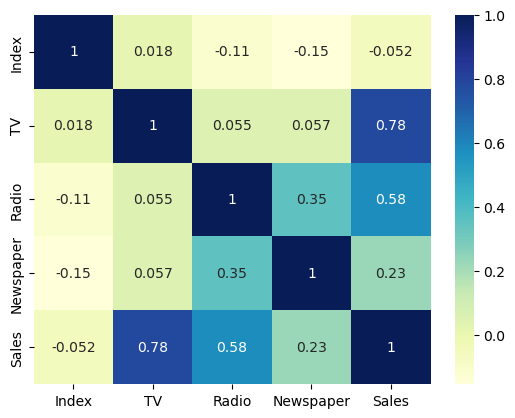

In [103]:
#correlation plot/matrix
corr = advertising.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot= True);

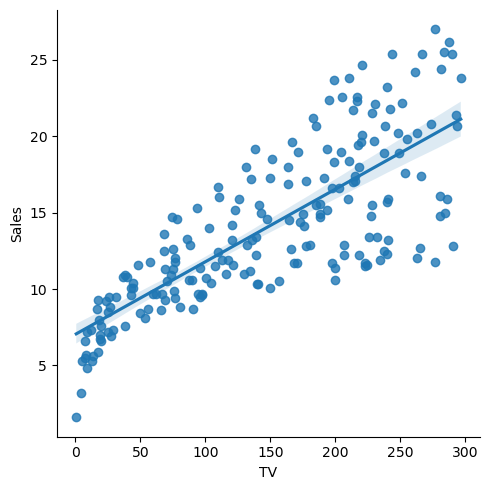

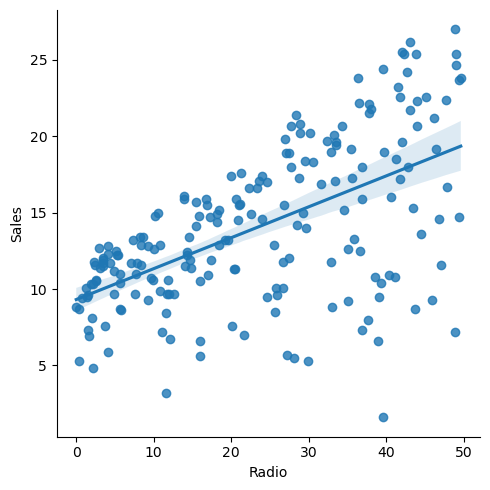

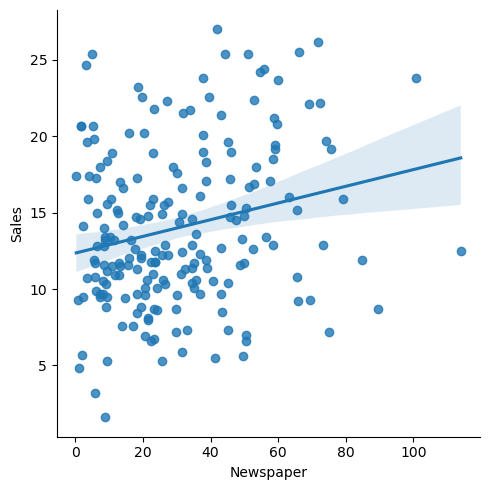

In [104]:
sns.lmplot(x='TV', y='Sales', data=advertising)
sns.lmplot(x='Radio', y='Sales', data=advertising)
sns.lmplot(x='Newspaper',y= 'Sales', data=advertising)

### Model Building

In [105]:
# Divide the data into “Attributes” and “labels”
X = advertising.drop('Sales', axis=1)
y = advertising[["Sales"]]


In [106]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [107]:
import statsmodels.api as sm
formula = "Sales ~ TV + Radio + Newspaper"
lin_model = sm.OLS.from_formula(formula, data=advertising).fit()
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.58e-96
Time:                        20:50:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [108]:
print(lin_model.params, "\n")

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 



In [109]:
results = []
names = []

In [110]:
models = [('LinearRegression', LinearRegression())]

In [111]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 1.703648


In [112]:
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    16.915917
dtype: float64


In [113]:
new_data = pd.DataFrame({'TV': [25], 'Radio': [63], 'Newspaper': [80]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    15.877397
dtype: float64


### Cross-Validation

Memorizing the training set is called overfitting.

During development,and particularly when training data is scarce,a practice called cross-validation can be used to train and validate an algorithm on the same data.

This approach involves randomly dividing the available set of observations into two parts, a training set and a validation set.

In [114]:
#cross validation
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
features = ["TV","Radio","Newspaper"]
x=advertising[features]
y=advertising.Sales

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print("The length of tranning size is %d" % len(X_train))
print("The length of test size is %d " % len(X_test))
model = lin_model.fit(X_train,y_train)
print("The R-squared value of the model is %.2f" % model.score(X_test,y_test))

The length of tranning size is 150
The length of test size is 50 
The R-squared value of the model is 0.86


In [115]:
#Testing 15-times the linear regression model for the Advertising data set.
for i in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
    model = lin_model.fit(X_train,y_train)
    print(model.score(X_test,y_test))

0.8859265055159029
0.928360156400042
0.9157797519882112
0.9222306344547785
0.8997067968911415
0.8537070985139776
0.9120037261778685
0.8058497970523881
0.9128028845553386
0.8593704013482607
0.8859373864792024
0.8757962695476085
0.8867687854616244
0.8329978953992361
0.883531025488732


### K-Fold Cross Validation

In the sklearn.model_selection there is a method called Kfold which can split the data set into the desired number of folds.

In [116]:
#K- Fold Cross Validation
from sklearn.model_selection import KFold
import numpy as np

lin_model = LinearRegression()
features = ["TV","Radio","Newspaper"]
x=advertising[features]
y=advertising.Sales

kf = KFold(n_splits=10)
scores=[]
for train,test in kf.split(x,y):
    model = lin_model.fit(x.values[train],y.values[train])
    score = model.score(x.values[test],y.values[test])
    print(score)
    scores.append(score)
    
print("The mean score for %d-fold cross validation is %.2f" % (kf.get_n_splits(),np.mean(np.array(scores))))

0.8730269590985926
0.8581613040148899
0.9296872316691295
0.8901327151837943
0.9314649771656575
0.9313873454259836
0.7597900975397526
0.9121709695144828
0.8389175289923596
0.9288231093749741
The mean score for 10-fold cross validation is 0.89


### cross_val_score method

The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

In [117]:
#cross_val_score method
lin_model = LinearRegression()
features = ["TV","Radio","Newspaper"]
x=advertising[features]
y=advertising.Sales

from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=4,n_repeats=2,random_state=True)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_model,x,y,cv=rkf)
print(scores)
print("Average score %.2f" % scores.mean())

[0.91562136 0.9035448  0.82960141 0.90589845 0.86904998 0.90912103
 0.8533589  0.92588745]
Average score 0.89


### Ridge Regression

Ridge regression,penalizes model parameters that become too large.

In [118]:
#Ridge Regression
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=0.5)
features = ["TV","Radio","Newspaper"]
x=advertising[features]
y=advertising.Sales

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model_ridge,x,y,cv=5)
print(scores)
print("Average score %.2f" % scores.mean())

[0.87865195 0.91763189 0.9293305  0.81444203 0.89547644]
Average score 0.89


### Lasso Regression

In [119]:
#Lasso Regression
from sklearn.linear_model import Lasso

model_ridge = Lasso(alpha=0.1)
features = ["TV","Radio","Newspaper"]
x=advertising[features]
y=advertising.Sales

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model_ridge,x,y,cv=5)
print(scores)
print("Average score %.2f" % scores.mean())

[0.87883467 0.91766119 0.92946215 0.81509772 0.89517222]
Average score 0.89


### Elastic Net

In [120]:
#Elastic Net
from sklearn.linear_model import ElasticNet

model_elasticnet = ElasticNet(alpha=0.1,l1_ratio=0.5)
features = ["TV","Radio","Newspaper"]
x=advertising[features]
y=advertising.Sales

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model_elasticnet,x,y,cv=5)
print(scores)
print("Average score %.2f" % scores.mean())

[0.87874334 0.91764332 0.92939993 0.81481783 0.89529628]
Average score 0.89
